# Titanic Disaster - My first Kaggle competition

### Import libraries

In [1]:
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import dash
import dash_core_components as dcc
import dash_html_components as html
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


### Download train train_data

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

### Head

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Basic metrics

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Relationship between social class and surviving

<AxesSubplot:xlabel='Pclass'>

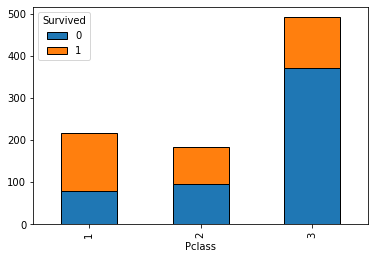

In [5]:
train_data.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True, ec='k')

### Relationship between relatives and surviving

<AxesSubplot:xlabel='Parch'>

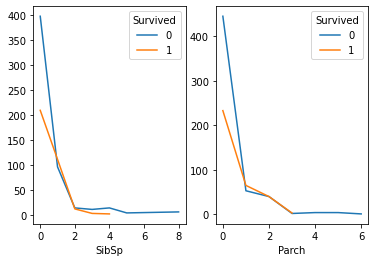

In [6]:
_, axes = plt.subplots(ncols=2)
train_data.pivot_table('PassengerId', 'SibSp', 'Survived', 'count').plot(ax=axes[0])
train_data.pivot_table('PassengerId', 'Parch', 'Survived', 'count').plot(ax=axes[1])

### There are not enough information about cabins

In [7]:
train_data.Cabin.describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

### Relationship between age of passengers and surviving

In [8]:
no_null_age_count = train_data.PassengerId[train_data.Age.notnull()].count()
print(f'Information about age is by {no_null_age_count} of {train_data.PassengerId.count()} passengers available.')

Information about age is by 714 of 891 passengers available.


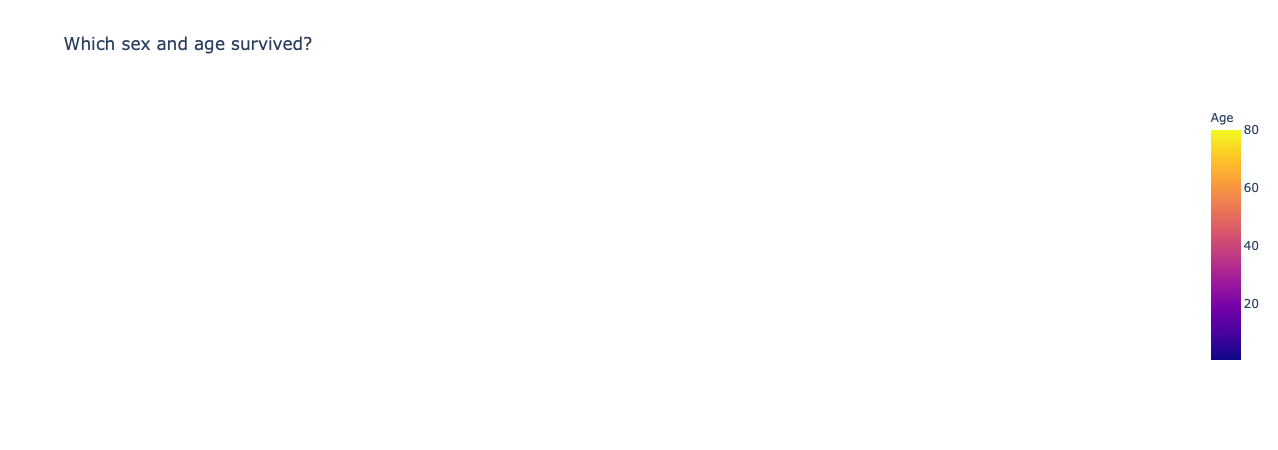

In [22]:
px.scatter_3d(train_data, x='Survived', y='Sex', z='Age', color='Age', title='Which sex and age survived?')

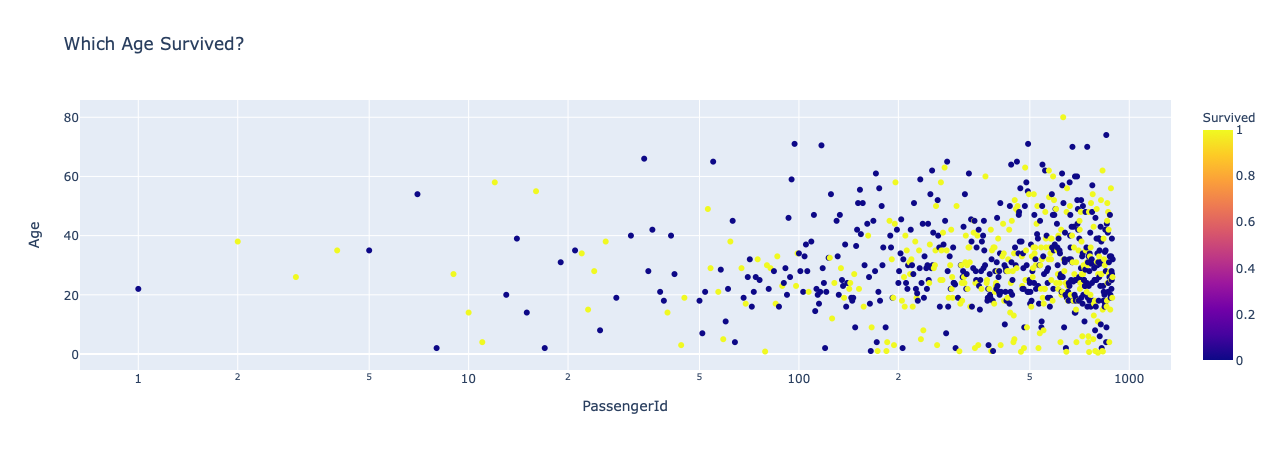

In [11]:
px.scatter(train_data, x='PassengerId', y='Age', color='Survived', log_x=True, size_max=20, title='Which Age Survived?')